# Image Classification

- Nearest Neighbours Classifier
- k-nearest Neighbours Classifier
- Validation Set for Hyperparameter Tuning

## Nearest Neighbours Classifier

- Rarely used in practice
- Compares the test image with all training image to determine the relative closeness in terms of pixel to predict the label as the closest training image.
- A simplest way of comparison is to take the absolute difference of pixels in the training and the test image.

![alt-text](https://cs231n.github.io/assets/nneg.jpeg)

Source: CS231n

Let us try to implement the nearest neighbors classifier as given in the CS231n modules.


In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Reshaping the images to be 32*32 with 3 channels
Xtrain_rows = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
Xtest_rows = X_test.reshape(X_test.shape[0], 32 * 32 * 3)

In [ ]:
import numpy as np
class NearestNeighbours(object):
  def __init__(self):
    pass
  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.X_train = X
    self.y_train = y
  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.y_train.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.X_train - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.y_train[min_index] # predict the label of the nearest example

    return Ypred
  
  

In [ ]:
nn = NearestNeighbours() # create a Nearest Neighbor classifier class
nn.train(Xtrain_rows, y_train) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xtest_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == y_test) ))


accuracy: 0.100000


## Distance Metrics

There are many techniques to compute the distance between vectors. A good distance metric makes the required change in the training process of a model. Clearly as we can observe, the absolute difference does not work very well and is missing on a lot of features, not to mention that the relative closeness is not determined in absolute terms and has many other factors.

In general, many instance-based learning algorithms such as nearest neighbours itself make use of distance metrics. The four most important distance metrics in machine learning are:

1. **Hamming Distance**: It calculates the distance between two binary vectors, also known as binary strings or bitstrings for short. 

- It is a measure of similarity between two strings of same length by comparing each corresponding character in the string and the number of positions at which the characters are different is referred as the hamming distance.
For example, Consider S1 = 'Delhi' and S2 = 'Delby'
We compare the corresponding characters to find the difference in the last two characters are different, so the hamming distance is 2!

2. **Euclidean Distance**: It calculates the distance between two real-valued vectors.

- It is the shortest distance known between two points.
- For given points,  $$(p_{1}, q_{1}), (p_{2}, q_{2})$$
The Euclidean Distance is defined as follows:
> $$D_{n} = {\sqrt{(p_1^2 - q_1^2) + (p_2^2 - q_2^2)}}$$

- Note: If the columns have different units to compare, then we need to normalise them before making use of Euclidean Distance.
- It is calculated as the square root of the sum of the squared differences between the two vectors.
- If there are millions of calculations to be done then we can simply remove the square root to reduce computational complexity.
- The resulting scores will have the same relative proportions after this modification and can still be used effectively within a machine learning algorithm for finding the most similar examples.<br/>
![alt-text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/220px-Euclidean_distance_2d.svg.png)

3. **Manhattan Distance**: Manhattan Distance is the sum of absolute differences between points across all the dimensions.

- We used Manhattan Distance in the aforementioned Nearest Neighbours Example.

- For given points,  $$(p_{1}, q_{1}), (p_{2}, q_{2})$$

The Manhattan Distance is given by:

> $$D_{n} = {|p_{1} - q_{1}| + |p_{2} - q_{2}|}$$

4. **Minkowski Distance**: It is the generalized form of Manhattan and Euclidean Distances. It simply adds up an order term 'p' whose value decides whether the distance metric is Manhattan or Euclidean or any higher ordered.

- When p is set to 1, the calculation is the same as the Manhattan distance. When p is set to 2, it is the same as the Euclidean distance.

-    p=1: Manhattan distance.
-    p=2: Euclidean distance.

- It gives a balance to distance metric since we can also incorporate intermediate values.

- For given points,  $$(p_{1}, q_{1}), (p_{2}, q_{2})$$

> $$D_{n} = {((|p_{1} - q_{1}| + |p_{2} - q_{2}|)^p)^1/p}$$



In [ ]:
# Library for Distance Metrics
from scipy.spatial import distance


In [ ]:
# Hamming Distance
string_1, string_2 = 'Delhi', 'Delby'
hamming_distance = distance.hamming(list(string_1), list(string_2))*len(string_1)
print('Hamming Distance b/w', string_1, 'and', string_2, 'is: ', hamming_distance)

Hamming Distance b/w Delhi and Delby is:  2.0


In [ ]:
# We can also define our very own method for computing Hamming Distance
def HammingDistance(a, b):
  return sum(abs(e1 - e2) for e1, e2 in zip(a, b))/len(a)
# We generally use one-hot encoded data instead of strings in categorical data
row1 = [0, 0, 0, 0, 0, 1]
row2 = [0, 0, 0, 0, 1, 0]
# calculate distance
dist = HammingDistance(row1, row2)
print(dist)
# to verify our calculation:
print("Hamming Distance by Pre-Built method: ", distance.hamming(row1, row2))

0.3333333333333333
Hamming Distance by Pre-Built method:  0.3333333333333333


In [ ]:
# Euclidean Distance
point_1 = (1, 2, 3)
point_2 = (4, 5, 6)
euclidean_distance = distance.euclidean(point_1, point_2)
print("Euclidean Distance = ", euclidean_distance)

Euclidean Distance =  5.196152422706632


In [ ]:
# We can compute it using our own method as well
def euclidean_dist(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))
dist = euclidean_dist(point_1, point_2)
print("Euclidean Distance = ", dist)

Euclidean Distance =  5.196152422706632


In [ ]:
manhattan = distance.cityblock(point_1, point_2)
print("Manhattan Distance = ", manhattan)

Manhattan Distance =  9


In [ ]:
# Manhattan Distance using our own method
def manhattan_distance(a, b):
	return sum(abs(e1-e2) for e1, e2 in zip(a,b))
print("Manhattan Distance = ", manhattan_distance(point_1, point_2))

Manhattan Distance =  9


In [ ]:
# Minkowski Distance
minkowski_dist = distance.minkowski(point_1, point_2, 1)
# This should be equivalent to Manhattan Distance
print("M1 = ", minowski_dist)
# This should be equivalent to Euclidean Distance
M2 = distance.minkowski(point_1, point_2, 2)
print("M2 = ", M2)

M1 =  9.0
M2 =  5.196152422706632


In [ ]:
# User defined method
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)
print("M1 = ", minkowski_distance(point_1, point_2, 1))
print("M2 = ", minkowski_distance(point_1, point_2, 2))

M1 =  9.0
M2 =  5.196152422706632


## L1 and L2 Vector Normalization

- L1 Normalisation is calculated as the sum of absolute differences between the vectors (similar to Manhattan Distance)

- L2 Normalisation is calculated as the square root of sum of the squared vector values (similar to Euclidean Distance)

We first need to define **Vector Norm** in general.

The norm of a vector maps vector values to values in [0,∞). In machine learning, norms are useful because they are used to express distances: this vector and this vector are so-and-so far apart, according to this-or-that norm.

> The non-negative value of the vector that represents the extent of the vector in space and is the vector's magnitude in the coordinate space.

Now, let us define:

- L1 Norm: The L1 norm is calculated as the sum of the absolute vector values, hence it is essentially Manhattan Distance calculated from the origin.
- L2 Norm: The L2 norm calculates the distance of the vector coordinate from the origin of the vector space. As such, it is also known as the Euclidean norm as it is calculated as the Euclidean distance from the origin. The result is a positive distance value.

Both these metrics are used in **Regularization** of the model coefficients while training to penalise a model which makes mistakes by reducing their coefficient values to prevent overfitting and also decrease complexity.

## L1-L2 Norms Comparison

- Robustness: L1>L2
Robustness refers to resistance to outliers in a dataset. The absolute sum of differences is obviously much resistant to outliers than the sum of squares which exponentially increases the value of outliers, hence leading to the fact that L1 Norm is better at handling outliers in data than L2 Norm.

> The more, a model ignores extreme values, the more it is robust.

- Stability: L2>L1
Stability is defined as resistance to horizontal adjustments. This is the perpendicular opposite of robustness. 

- Solution Numeracy: L2 is Euclidean distance, there is always one right answer as to how to get between two points fastest. Because L1 is taxicab distance, there are as many solutions to getting between two points as there are ways of driving between two points in Manhattan! 

![alt-text](https://upload.wikimedia.org/wikipedia/commons/0/08/Manhattan_distance.svg)

![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/L1vsL2.png?token=AHIGNHS7YCL5XRR4B2SUC3C67YBGQ)

In the image above, we can see that the solution for the L1-norm (to get to the line from inside our diamond-shaped space), it's best to maximize x1 and leave x2 at zero, whereas the solution for the L2-norm (to get to the line from inside our circular-shaped space), is a combination of both x1 and x2. It is likely that the fit for L2 will be more precise, however, with the L1 norm, our solution will be more sparse.

Since the L2-norm penalizes larger errors more strongly, it will give a solution which has fewer large residual values along with fewer very small residuals as well. The L1-norm, on the other hand, will give a solution with more large residuals, however, it will also have a lot of zeros in the solution.

Hence, we might want to use the L1-norm when we have constraints on feature extraction. We can easily avoid computing a lot of computationally expensive features at the cost of some of the accuracy, since the L1-norm will give us a solution which has the weights for a large set of features set to zero.

A case would be real-time detection or tracking of an object/face/material using a set of diverse handcrafted features with a large margin classifier like an SVM in a sliding window fashion where faster feature extraction is desirable.

- Computational difficulty: L2 > L1

L2 has a closed form solution because it's a square of errors. L1 does not have a closed form solution because it is a non-differentiable piecewise function, as it involves an absolute value. For this reason, L1 is computationally more expensive, as we can't solve it in terms of matrix math, and mostly rely on approximations.
Sparsity: L1 > L2

Sparsity is the property of having coefficients which are highly significant: very near 0 or very not near 0. In theory, the coefficients very near 0 can later be eliminated.

Feature selection is a further-involved form of sparsity: instead of shrinking coefficients near to 0, feature selection is taking them to exactly 0, and hence excluding certain features from the model entirely.

It is interesting to consider differences between the two metrics. In particular, the L2 distance is much more unforgiving than the L1 distance when it comes to differences between two vectors. That is, the L2 distance prefers many medium disagreements to one big one. L1 and L2 distances (or equivalently the L1/L2 norms of the differences between a pair of images) are the most commonly used special cases of a p-norm.

For more details, refer to this blog post on Regularization: [Link](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)

In [ ]:
# L1 Norm
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1)
print("L1: ", l1)
	
# L2 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l2 = norm(a)
print("L2: ", l2)

[1 2 3]
L1:  6.0
[1 2 3]
L2:  3.7416573867739413


In [ ]:
# Let us try to retrain CIFAR-10 using Euclidean Distance as the closeness metric
# distances = np.sqrt(np.sum(np.square(self.X_train - X[i,:]), axis = 1))

import numpy as np
class EuclideanNearestNeighbours(object):
  def __init__(self):
    pass
  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.X_train = X
    self.y_train = y
  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.y_train.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sqrt(np.sum(np.square(self.X_train - X[i,:]), axis = 1))
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.y_train[min_index] # predict the label of the nearest example

    return Ypred
  

In [34]:
nn = EuclideanNearestNeighbours() # create a Nearest Neighbor classifier class
nn.train(Xtrain_rows, y_train) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xtest_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == y_test) ))

accuracy: 0.100000


## K-Nearest Neighbours

The intuition behind K-Nearest Neighbours is that instead of using all the images in the training set to find the closest one to the test image, we simply make use of a set of closest images, assign probability to each of them in order to finally determine the label. In particular, when k = 1, we recover the Nearest Neighbor classifier. Intuitively, higher values of k have a smoothing effect that makes the classifier more resistant to outliers.
![alt-text](https://cs231n.github.io/assets/knn.jpeg)

An example of the difference between Nearest Neighbor and a 5-Nearest Neighbor classifier, using 2-dimensional points and 3 classes (red, blue, green). The colored regions show the decision boundaries induced by the classifier with an L2 distance. The white regions show points that are ambiguously classified (i.e. class votes are tied for at least two classes). Notice that in the case of a NN classifier, outlier datapoints (e.g. green point in the middle of a cloud of blue points) create small islands of likely incorrect predictions, while the 5-NN classifier smooths over these irregularities, likely leading to better generalization on the test data
(Source: CS231n)

**Algorithm for K-Nearest Neighbours**<br/>


1. Load the data into the program
2. Initialize the number of nearest neighbours to be considered ie 'K' (preferably odd).
3. ```
for each tuple in datafile: # for each entry point
      - Calculate the distance between the data point(tuple) to be classified and each data point given in the file.
      - Add the distances corresponding to the data points or entries in the given datafile 
      - Sort the data in datafile from smalles to largest with respect to distance
Pick the first k entries from the sorted list
Observe the labels of the selected entries
```

4. Return mode of the k labels for classification/mean of the labels for regression

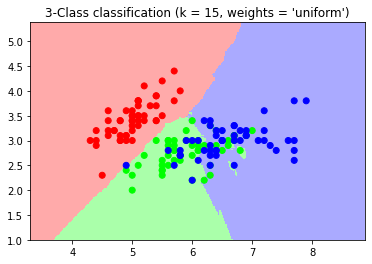

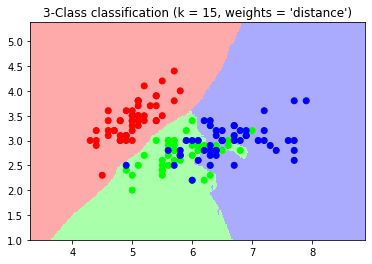

In [36]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [43]:
import pandas as pd
import numpy as np
import operator

dataset = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
# We are using Euclidean Distance as metric for knn
def Euclidean(x1, x2, length):
  dist = 0
  for i in range(length):
    dist += np.square(x1[i] - x2[i])
  return np.sqrt(dist)

# Define knn method
def knn(train, test, k):
  distances = {}
  length = test.shape[1]
  for x in range(len(train)):
    dist = Euclidean(test, train.iloc[x], length)
    distances[x] = dist[0]
  sortdist = sorted(distances.items(), key=operator.itemgetter(1))
  neighbors = []
  for x in range(k):
        neighbors.append(sortdist[x][0])
  Count = {}  # to get most frequent class of rows
  for x in range(len(neighbors)):
        response = train.iloc[neighbors[x]][-1]
        if response in Count:
            Count[response] += 1
        else:
            Count[response] = 1
  sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
  return (sortcount[0][0], neighbors)
testSet = [[6.8, 3.4, 4.8, 2.4]]
test = pd.DataFrame(testSet)

# assigning different values to k
k = 1
k1 = 3
k2 = 11

# supplying test data to the model
result, neigh = knn(dataset, test, k)
result1, neigh1 = knn(dataset, test, k1)
result2, neigh2 = knn(dataset, test, k2)

# printing output prediction

print(result)
print(neigh)
print(result1)
print(neigh1)
print(result2)
print(neigh2)


Virginica
[141]
Virginica
[141, 145, 110]
Virginica
[141, 145, 110, 115, 139, 147, 77, 148, 140, 112, 144]
